<a href="https://colab.research.google.com/github/teja463/DotNet-Developer-Roadmap/blob/main/Basic_Data_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Pandas Data Engineering
Author: W. Tod Newman, updates by Barclay Brown, Phil Sallee and others

## Learning Objectives


*   Learn how to import files into Pandas Dataframes and how to develop understanding of what's in the data
*   Learn how to access and manipulate the data in the DataFrame.
*   Learn how to do vectorized math and Boolean Filtering on the Dataframe.
*   Understand the best ways to do looping in Python.
*   Understand some simple approaches to data ingest and how they compare.

In this exercise we're using data from the UC Irvine Open Data archive.  This data is in .CSV format and is easily pulled into Pandas.  See the Handling Complex Data files notebook for details on how to manipulate larger, zipped files from UCI.

## Contents
* [Basic Pandas Data Operations](#scrollTo=gk7FpEzVbu7X)
* [Python Loop Optimization Demonstration](#scrollTo=keF9jUSWOVVf)
* [Python Data Ingest Optimization for Speed and Memory Footprint](#scrollTo=zRYJZ1EkI4Nr&line=16&uniqifier=1)

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
!pip install line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 8.6 MB/s eta 0:00:00


# Basic Pandas Operations
## Import a Data File and Read it Into a Pandas DataFrame

Here  we pull data from the UC Irvine open data repository.  This data is useful because often it can be used to test algorithms and ML workflows.  Plus, it works well in CoLaboratory because when we load it into the Google CoLaboratory system it doesn't need to pass through the firewall.

First we read the file in as a .CSV and then we print the dataframe.  You can print the dataframe by merely typing "df" only if you do it on the last line.  Otherwise, you need to print(df).  The formatting of the latter will be less pleasant than the former, BTW.

You can comment out any of the last 4 lines to see what those lines do.  The last one uncommented will be printed.

In [2]:
# Get COVID-19 Files from JHU GitHub
!wget -O time_series_19-covid-Confirmed.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
!wget -O time_series_19-covid-Deaths.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
!wget -O time_series_19-covid-Recovered.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

# Grab Data from Tod's GitHub
!wget -O world_pop_data.csv https://raw.githubusercontent.com/todnewman/data/master/covid19/world_pop_data.csv
!wget -O china_pop_data.csv https://raw.githubusercontent.com/todnewman/data/master/covid19/china_pop_data.csv

--2025-05-26 10:48:44--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819904 (1.7M) [text/plain]
Saving to: ‘time_series_19-covid-Confirmed.csv’

time_series_19-covi 100%[===================>]   1.74M  --.-KB/s    in 0.1s    

2025-05-26 10:48:44 (17.3 MB/s) - ‘time_series_19-covid-Confirmed.csv’ saved [1819904/1819904]

--2025-05-26 10:48:44--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133,

## Read Parkinson's Data into a Pandas Dataframe

We'll use this data to demonstrate some basic capabilities of Pandas.  Then we'll show how it all comes together using the COVID-19 Data we just downloaded in the previous step.

In [3]:
# Grab Data from UC Irvine archives.  Do some basic Pandas actions.
width = 20
height = 10
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

# Misc things you can do with a DataFrame

#df.tail(2) # Last 2 records
#df.keys() # List of all the Columns
#print(df['name']) # The column with the header 'name'

# Grab a specific Value from the DataFrame

row_indexer = 19
column_indexer = 12
print(df.iloc[row_indexer,column_indexer])

# All the values in column 12

#print(df.iloc[:,12])

# Records/Rows 0 through 10

#print(df[10:40] )




# Plot all the parameters

'''df.plot(figsize=(width,height))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()'''

df.head() # First 5 records

0.02374


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Print Column Headers (keys) and Use for Quick Data Exploration

This is a useful thing to do.  If you assign df.keys() to a variable, it becomes a Python list.  You can iterate through the list to access the individual keys one by one or you can access each parameter in the list with it's index (i.e., keys[3]).  This is a useful way to select features without having to know the name of the header.

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype='object')

MDVP:Flo(Hz)


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


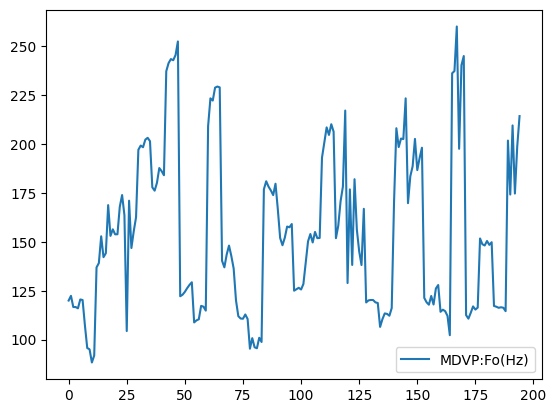

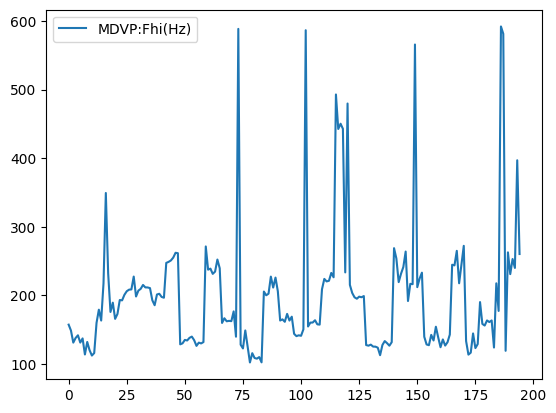

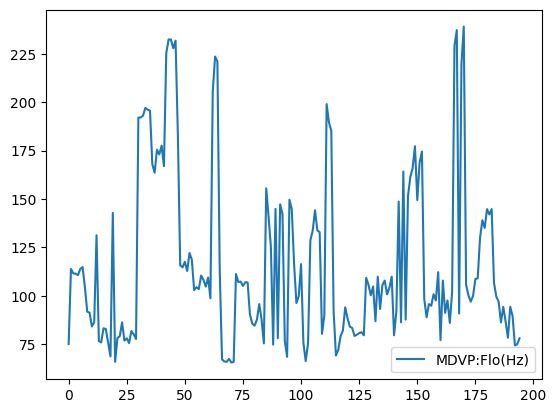

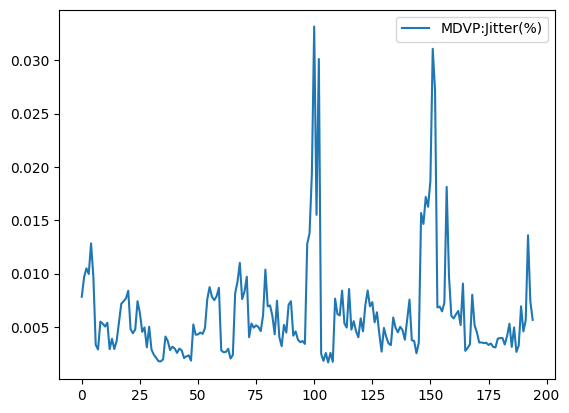

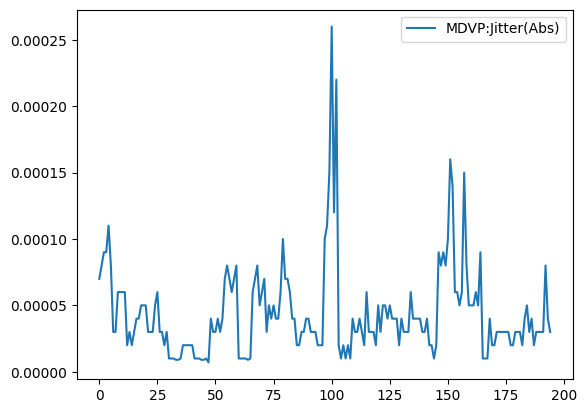

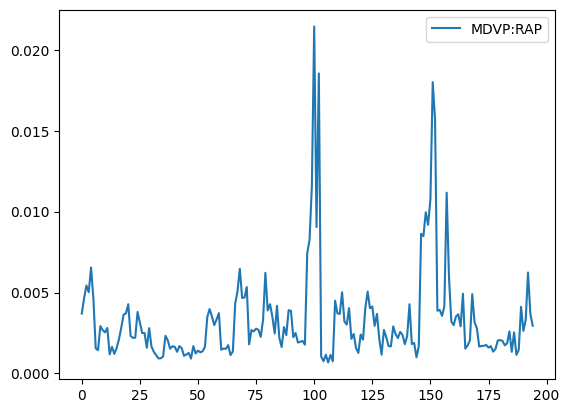

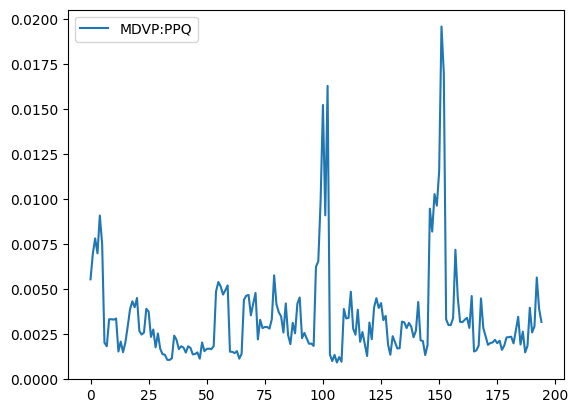

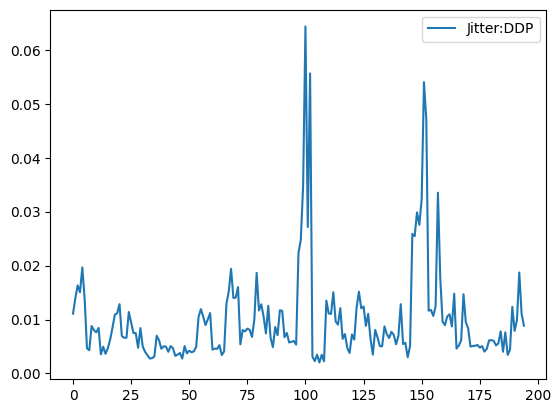

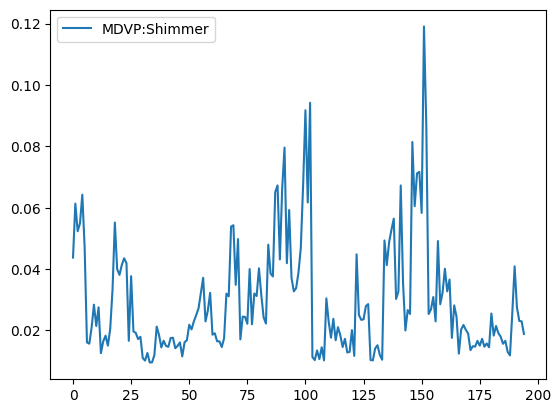

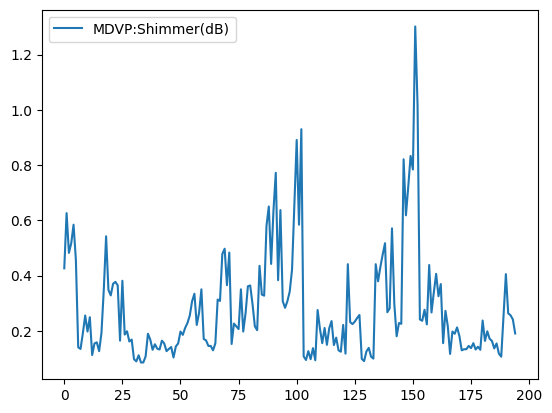

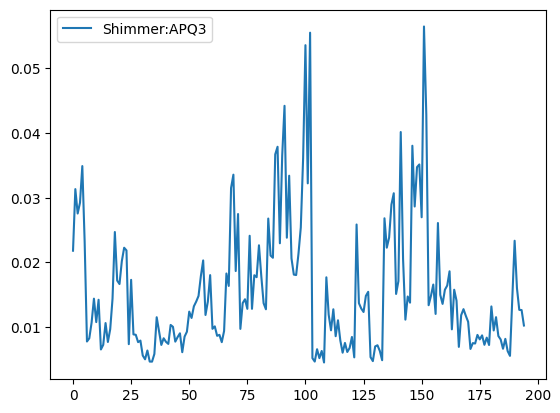

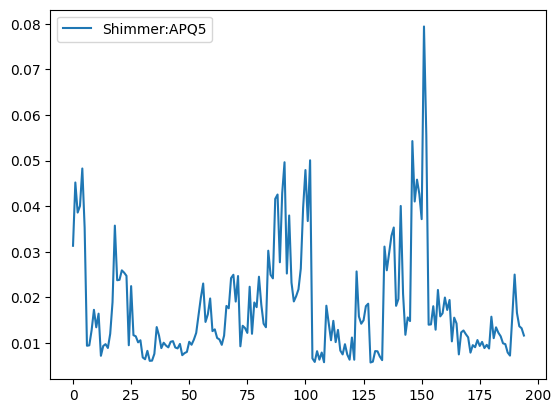

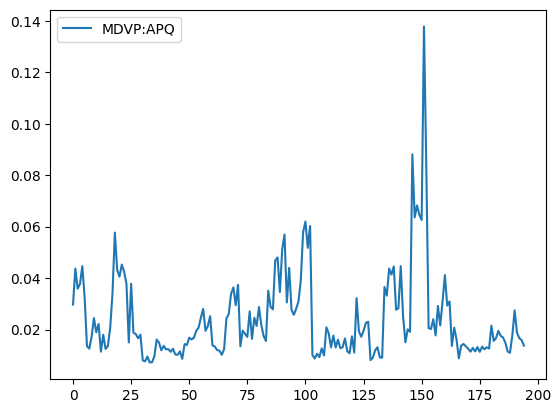

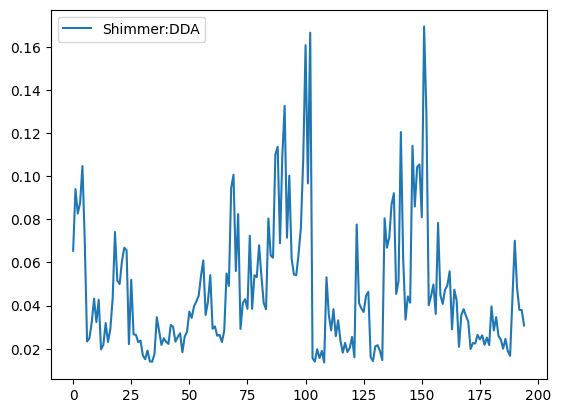

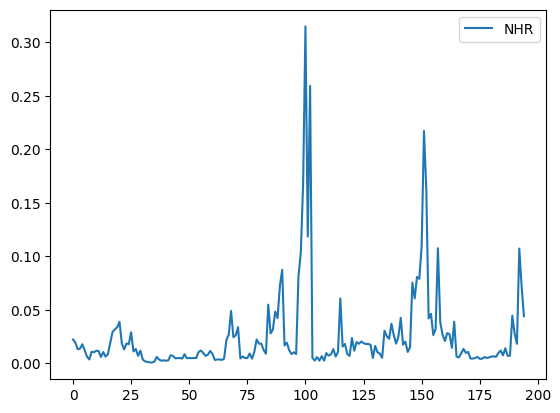

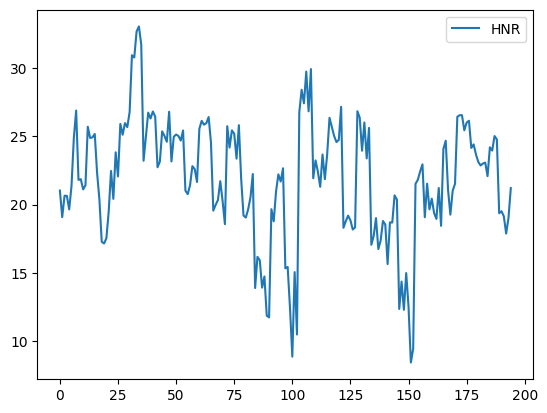

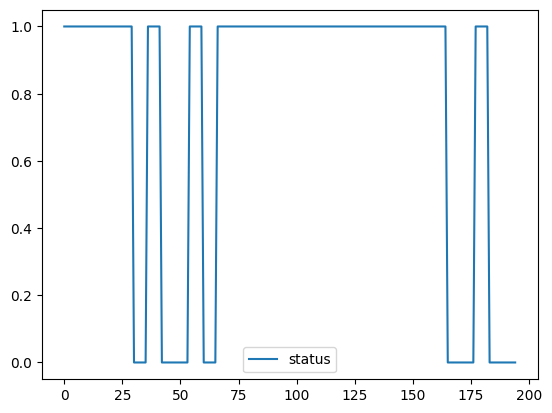

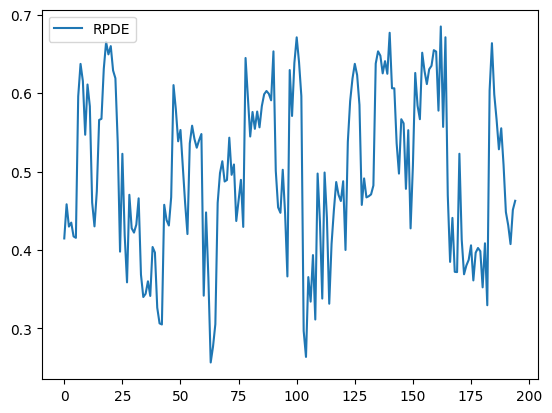

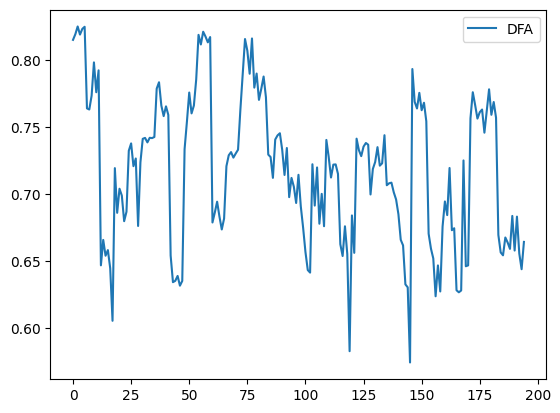

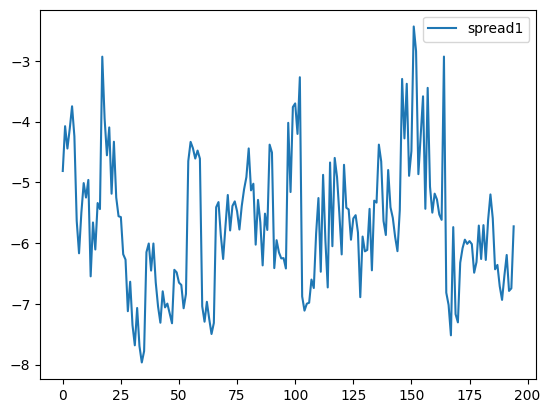

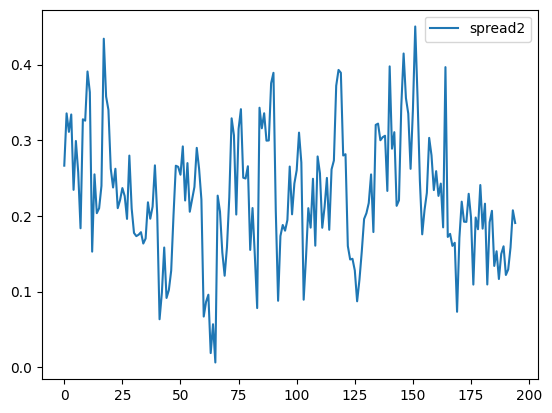

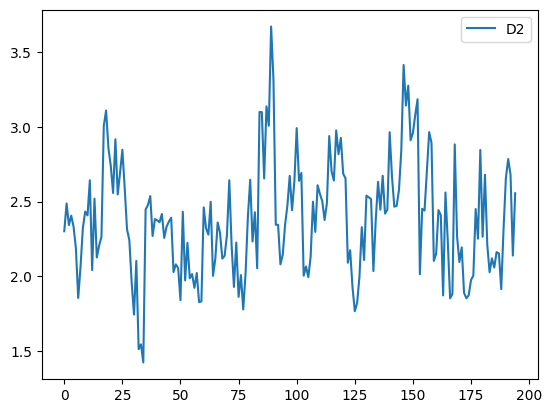

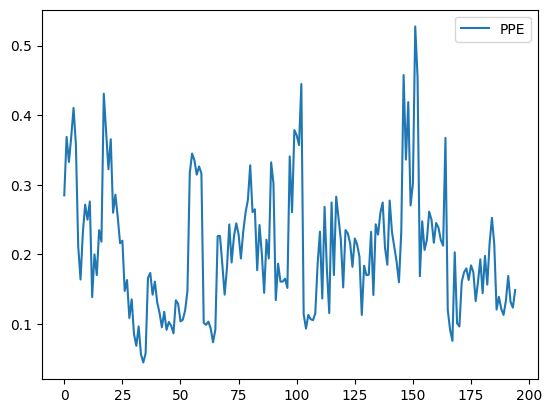

In [4]:
keys = df.keys()
print (keys)
print()
print(keys[3]) # Handy in case you don't want to type the name

# iterate through the keys.  Here's a useful way to do data exploration.
for i,k in enumerate(keys):
    if i>0:
        df.plot( y=keys[i])

## Information on the DataFrame

Pandas gives us a couple of useful calls to get info on the different features in the DataFrame.

In [5]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Accessing parameters in the DataFrame

You can see from the below how Pandas gives access to the index, columns, and values of the DataFrame.  You can use .columns to change the header names if that's desirable.  Understanding the shape of the dataframe (in this case, it is 195 rows by 24 columns) will help you understand if you get shape mismatch errors.

In [ ]:
print (df.index)
print ("Shape of the Dataframe is: ", df.shape)

print (df.columns)  # Same thing as df.keys()

print (df.values)

## Sorting

sort_values is useful.  You can either sort by something like I did here (keys[3]) or you can sort by the header name ('MDVP:Flo(Hz)').  

In [ ]:
keys = df.keys()

print (keys[1:6])

df.sort_values(keys[6], ascending=False)

## Print out selected Columns in the DataFrame

This allows you to pick which columns you want to see.  The first line selects just one column.  The second shows how you can select a slice (multiple contiguous columnts). The third shows how you can just select discrete sets of columns.  The fourth line shows us passing an array of headers to the DataFrame.  You will probably notice that this isn't much different than the approach for the 3rd line.

In [ ]:
#df[keys[1]]
#df[keys[1:6]]
#df[['MDVP:Fo(Hz)', 'MDVP:Jitter(%)']]
my_header_list = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:PPQ']
df2 = df[my_header_list]
df2.to_csv('three_cols.csv')
df2

In [ ]:
!ls -l /content

In [ ]:
#df[2:8] # Filter out 3 rows in the DataFrame
df.loc[:,[keys[1], keys[7]]] # Filter headers 1 and 7 for all records
#df.loc[1:4,[keys[1], keys[7]]] # Filter headers 1 and y for just three records

## Filtering

Often its useful to be able to select all records that meet a criteria.  For example, we might want all records where MDVP:Fo(Hz) > 120.  Or as another example, we might all records where YEAR == 2018.

In [ ]:
%%time
mdvp_hi_fo_freq = df[keys[1]] < 120  # Set up the boolean.  The vaue of mdvp_hi_fo_freq will be True if it is > 120 and False if it is < 120
mdvp_hi_fo_freq2 = df[keys[1]] >= 117
df_117_120 = (df[mdvp_hi_fo_freq&mdvp_hi_fo_freq2])
print(df_117_120)

## Pandas Math

In [ ]:

print(keys)
print("Mean Value for Column 1 is %s" % df[keys[1]].mean())  # Calculate the mean value for the whole column
print("Median Value for Column 1 is %s" % df[keys[1]].median())
#print("Cumulative Sum for column 1 is %s" % df[keys[1]].apply(np.cumsum))
df['Product1'] = df[keys[1]] * df[keys[2]]  #Multiply two DataFrame columns into a product.
print(df.keys())
df['Product1'][0:5]

#df

## Putting it all together using COVID-19 Data!

In [ ]:
#
#  First import the csv files into Pandas DataFrames
#

df_confirmed_w = pd.read_csv('time_series_19-covid-Confirmed.csv')
df_deaths_w = pd.read_csv('time_series_19-covid-Deaths.csv')
df_recovered_w = pd.read_csv('time_series_19-covid-Recovered.csv')

pop_df = pd.read_csv('world_pop_data.csv')
china_pop_df = pd.read_csv('china_pop_data.csv')

# Fix dates to remove slashes and replace with underscores.  Makes things
# simpler.

df_confirmed_w.columns = df_confirmed_w.columns.str.replace("/", "_")
df_deaths_w.columns = df_deaths_w.columns.str.replace("/", "_")
df_recovered_w.columns = df_recovered_w.columns.str.replace("/", "_")

df_keys = df_confirmed_w.keys()

# Simple way to grab today's date, because it will be the header for the last
# column.

col_today = df_keys[len(df_keys) - 1]
col_yesterday = df_keys[len(df_keys) - 2]
col_two_days = df_keys[len(df_keys) -3]
print(f"Today's date: {col_today}")

#df_confirmed_w.sort_values(by=col_today, ascending=False)[0:20]
df_confirmed_w['Country-Prov'] = df_confirmed_w[['Country_Region', 'Province_State']].fillna('').sum(axis=1)
df_recovered_w['Country-Prov'] = df_recovered_w[['Country_Region', 'Province_State']].fillna('').sum(axis=1)
df_deaths_w['Country-Prov'] = df_deaths_w[['Country_Region', 'Province_State']].fillna('').sum(axis=1)

#
# Blend Population for Chinese Provinces into the dataset
#
df_confirmed_w = df_confirmed_w.merge(china_pop_df, how='left', left_on=['Country_Region', 'Province_State'],
                  right_on = ['Country', 'Province'])
df_deaths_w = df_deaths_w.merge(china_pop_df, how='left', left_on=['Country_Region', 'Province_State'],
                  right_on = ['Country', 'Province'])
#
# Blend Population for World Countries into the dataset
#
df_confirmed_w = df_confirmed_w.merge(pop_df, how='left', left_on=['Country_Region'],
                  right_on = ['name'])
df_deaths_w = df_deaths_w.merge(pop_df, how='left', left_on=['Country_Region'],
                  right_on = ['name'])

#
# Do some math to make sure populations are aligned across countries and provinces
#
df_deaths_w['pop'] = df_deaths_w['pop2019'].fillna(df_deaths_w['chipop'])
df_deaths_w.drop(['pop2019','chipop'], axis=1, inplace=True)
df_confirmed_w['pop'] = df_confirmed_w['pop2019'].fillna(df_confirmed_w['chipop'])
df_confirmed_w.drop(['pop2019','chipop'], axis=1, inplace=True)

#
# ********** SHIFT TO BUILDING TODAY'S DATAFRAME ********************
#

"""
Calculate the instantaneous rate of change.  This is the tangent to the curve
and provides us today's slope of a non-linear function (Case Rates, Death Rates, etc.).
To do this we're going to fit a 3rd order polynomial to the last 60 data points
and then use that to calculate the IROC.
"""


def g(x, z, h = 1e-3): # This does the calculus
    def function(x):
        y = np.polyval(z,x)
        return y
    deriv = (function(x + h) - function(x)) / h
    return round(deriv, 4)

def calc_fit(row): # Calculate the first derivative (IROC)
    # We're going to look at the latest 60 results for fitting our curve.  This
    # will help us avoid weirdness like negative rates.

    row = row.sort_values(ascending=True)
    lenrow = len(row)
    row = row[lenrow-60: lenrow]

    # New length of the series of values for our curve fit
    axisvalues=list(range(1,len(row)+1))
    len_d = len(axisvalues)

    # Want at least 3 points to fit a curve
    if len_d > 3: # Enough points to do a reasonable LR fit
        z = np.polyfit(axisvalues, row, 3)
    else:
        z = (0,0,0)

    # Now that we have fit a curve, take the derivatives
    iroc = g(len_d, z)
    return iroc

def calc_fit_delta(row): # Calculate a simple 2nd derivative (dIROC)
    # We're going to look at the latest 60 results for fitting our curve.  This
    # will help us avoid weirdness like negative rates.

    row = row.sort_values(ascending=True)
    lenrow = len(row)
    row = row[lenrow-60: lenrow]

    # New length of the series of values for our curve fit
    axisvalues=list(range(1,len(row)+1))
    len_d = len(axisvalues)

    if len_d > 3: # Enough points to do a reasonable LR fit
        z = np.polyfit(axisvalues, row, 2)
    else:
        z = (0,0,0)

    #Take the derivative of today's value minus that of two days ago
    iroc_d = g(len_d, z) - g(len_d-2, z)
    return iroc_d
#
#  Calculate the curve slopes for death and confirmed case curves.
#

for i,nm in enumerate(['deaths', 'confirmed']):
    if i==0:
        df = df_deaths_w
    else:
        df = df_confirmed_w

    dfm_keys = df.keys()
    today_idx = df.columns.get_loc(col_today)

    # These are all the daily number features
    day_features = dfm_keys[4:today_idx+1]

    #df_t = df_merge_c[day_features]
    # Normalize cases by 1000 population for slope
    df_t_norm = df[day_features].div(df['pop'], axis=0)
    df_t = df[day_features]

    axisvalues=list(range(1,len(df_t.columns)+1))

    iroc = df_t.fillna(0).apply(calc_fit, axis=1)
    iroc_d = df_t.fillna(0).apply(calc_fit_delta, axis=1)
    iroc_n = df_t_norm.fillna(0).apply(calc_fit, axis=1)
    iroc_d_n = df_t_norm.fillna(0).apply(calc_fit_delta, axis=1)
    df['inst_rate_of_change'] = iroc
    df['inst_roc_delta'] = iroc_d
    df['inst_rate_of_change_norm'] = iroc_n
    df['inst_roc_delta_norm'] = iroc_d_n

#
# Now we have enough to build Summary DataFrame for Current Date
#
df_summ_w = pd.DataFrame()

df_summ_w['Country_Region'] = df_confirmed_w['Country_Region']
df_summ_w['Province_State'] = df_confirmed_w['Province_State']
df_summ_w['pop'] = df_confirmed_w['pop']
df_summ_w['state'] = df_confirmed_w['state']
df_summ_w['Country-Prov'] = df_confirmed_w['Country-Prov']
df_summ_w['Lat'] = df_confirmed_w['Lat']
df_summ_w['Long'] = df_confirmed_w['Long']
df_summ_w['Confirmed'] = df_confirmed_w[col_today]
df_summ_w['Deaths'] = df_deaths_w[col_today]
df_summ_w['Recovered'] = df_recovered_w[col_today]
df_summ_w['New_Cases'] = df_confirmed_w[col_today] - df_confirmed_w[col_yesterday]
df_summ_w['Delta_Active'] = df_summ_w['New_Cases'] - (df_confirmed_w[col_yesterday] - df_confirmed_w[col_two_days])
df_summ_w['Delta_Deaths'] = df_summ_w['Deaths'] - (df_deaths_w[col_yesterday])
df_summ_w['IROC_c'] = df_confirmed_w['inst_rate_of_change']
df_summ_w['dIROC_c'] = df_confirmed_w['inst_roc_delta']
df_summ_w['IROC_d'] = df_deaths_w['inst_rate_of_change']
df_summ_w['dIROC_d'] = df_deaths_w['inst_roc_delta']
df_summ_w['IROC_c_n'] = df_confirmed_w['inst_rate_of_change_norm']
df_summ_w['dIROC_c_n'] = df_confirmed_w['inst_roc_delta_norm']
df_summ_w['IROC_d_n'] = df_deaths_w['inst_rate_of_change_norm']
df_summ_w['dIROC_d_n'] = df_deaths_w['inst_roc_delta_norm']
df_summ_w['cases_per_1000'] = (df_summ_w['Confirmed']/(df_summ_w['pop'])).fillna(0)
df_summ_w['Deaths_per_1000'] = (df_summ_w['Deaths']/(df_summ_w['pop'])).fillna(0)
df_summ_w['%Deaths_to_cases'] = (df_summ_w['Deaths']/(df_summ_w['Confirmed']+.001)*100).fillna(0)

# We're only going to print the below columns to save space and make it readable.
print_cols = ['Country-Prov','Confirmed', 'Deaths', 'Recovered', 'New_Cases',
              'Delta_Deaths', 'IROC_c_n', 'dIROC_c_n', 'IROC_d_n', 'dIROC_d_n',
              'cases_per_1000', 'Deaths_per_1000']
caseno_fil = df_summ_w['New_Cases'] > 0
df_summ_w[caseno_fil][print_cols].sort_values(by='IROC_c_n', ascending=False)[0:20]

# How to select A Particular Country for Analysis

In [ ]:
country = 'China'
aus_fil = df_summ_w['Country_Region'] == country
df_summ_w[aus_fil][print_cols].sort_values(by='IROC_c_n', ascending=False)

In [ ]:
df_summ_w[print_cols].sort_values(by='Deaths_per_1000', ascending=False)[0:25]

# Efficient DataFrame Operations

### Looping

We'll show a few of approaches to looping and time them.  This example is derived from work at https://github.com/s-heisler/pycon2017-optimizing-pandas

This function essentially calculates the Great Circle distance between two (Lat,Long) pairs.  We're going to get the distances between Tod's house (32.266, 110.985) and the location of every hotel in NYC.  

### Haversine formula

${\displaystyle {\begin{aligned}d&=2r\arcsin \left({\sqrt {\operatorname {hav} (\varphi _{2}-\varphi _{1})+\cos(\varphi _{1})\cos(\varphi _{2})\operatorname {hav} (\lambda _{2}-\lambda _{1})}}\right)\\&=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\cos(\varphi _{2})\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)\end{aligned}}}$

where

φ1, φ2 are the latitude of point 1 and latitude of point 2 (in radians),
λ1, λ2 are the longitude of point 1 and longitude of point 2 (in radians).

### Basic setup block below

In [ ]:
from math import radians, cos, sin, asin, sqrt

!wget -O /content/NYC_hotels.csv 'https://raw.githubusercontent.com/todnewman/data/master/NYC_hotels.csv.txt'

df = pd.read_csv('NYC_hotels.csv', encoding='cp1252')


def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    radius = 3958.8 # Radius of earth in miles

    # convert decimal degrees to radians.  Map applies the deg2rad
    # function to the list of latitudes and longitudes.
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])

    # haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Below we calculate the haversine distance using the formula above
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    d = 2 * radius * np.arcsin(np.sqrt(a))

    return d

# Define a function to manually loop over all rows and return a series of distances
# This is the Dumb Function.
#
def haversine_looping(df):
    distance_list = []
    for i in range(0, len(df)): # Go through every row in the dataset
        # Find distance from Tod's house in Tucson to every Hotel in NYC
        # we do this by walking down every row of hotels and grabbing lat and long.
        d = haversine(32.266, 110.985, df.iloc[i]['latitude'], df.iloc[i]['longitude'])
        distance_list.append(d)
    return distance_list

print (df.keys())
print (df.info())

res = []
name = []


### The WORST way to do it!

Here we're looping through the dataframe one loop at a time.  This seems natural and is easy to follow, but it's also the slowest possible way to solve this problem because it does not take advantage of any Python optimizations.

In [ ]:
res = []
num = []
mean_res = []
std_res = []

loops = 5

for l in range(0,loops):
    start = time.time()
    #
    # Run the haversine looping function by passing the entire dataframe to the
    # looping function above.  "For i in range(0,len(df)):"
    #
    df['distance'] = haversine_looping(df)

    # Measure the timing for this approach
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)
    res.append(msg)
    num.append(delta)
name.append("Basic Looping")
print(f"RESULTS of {loops} Loops - Basic Looping")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

### A Better Way...

Here we're going to use .itterrows(), which is an optimized looping function.  This is a data generator which returns a row index and value.

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    haversine_series = []
    for index, row in df.iterrows():
        haversine_series.append(haversine(32.266, 110.985, row['latitude'], row['longitude']))
    df['distance'] = haversine_series
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)
    res.append(msg)
    num.append(delta)
name.append('Iterrow Looping')
print(f"RESULTS of {loops} Loops - Optimized Looping")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

### Better yet...

Using the .apply() function is even better than .itterows()

.apply() is more optimized than iterrows()

We use an anonymous lambda function to apply our Haversine function on each row, which allows us to point to specific cells within each row as inputs to the function. The lambda function includes the axis parameter at the end, in order to specify whether Pandas should apply the function to rows (axis = 1) or columns (axis = 0).

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    # Timing apply on the Haversine function
    df['distance'] = df.apply(lambda row: haversine(32.266, 110.985, row['latitude'], row['longitude']), axis=1)
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)
    res.append(msg)
    num.append(delta)
name.append('Looping with Apply')
print(f"RESULTS of {loops} Loops - Looping with Apply Function")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

In [ ]:
# Lets use the line profiler to figure out what the lambda is doing and where we can optimize next!

%load_ext line_profiler

%lprun -f haversine df.apply(lambda row: haversine(32.266, 110.985, row['latitude'], row['longitude']), axis=1)


### Vectorization!!

Vectorization is the process of executing operations on entire arrays at once.  This unlocks the power of the modern processing architectures.

*  Pandas includes all sorts of vectorized functions for everything from mathematical operations to aggregations and string functions (for an extensive list of available functions, check out the Pandas docs).
*  The built-in functions are optimized to operate specifically on Pandas series and DataFrames.

Vectorized Pandas functions are going  almost always be preferable to looping techniques like we show above

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    # Vectorized implementation of Haversine applied on Pandas series
    df['distance'] = haversine(32.266, 110.985, df['latitude'].astype(float), df['longitude'].astype(float))
    #results['Pandas Vectorization'] = _.best
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)
    res.append(msg)
    num.append(delta)
name.append('Pandas Vectorization')
print(f"RESULTS of {loops} Loops - Looping with Pandas Vectorization")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

### Vectorization to the Next Level!  Numpy arrays!

The NumPy library, which describes itself as a “fundamental package for scientific computing in Python”, performs operations under the hood in optimized, pre-compiled C code.
*  Like Pandas, NumPy operates on array objects (referred to as ndarrays)
*  Numpy eliminates overhead inherent in Pandas series (such as indexing, data type checking, etc).

As a result, operations on NumPy arrays can be significantly faster than operations on Pandas series.  See below for a dramatic example!

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    # Vectorized implementation of Haversine applied on Pandas series
    df['distance'] = haversine(32.266, 110.985, df['latitude'].values, df['longitude'].values)
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)
    res.append(msg)
    num.append(delta)
name.append('Numpy Vectorization')
print(f"RESULTS of {loops} Loops - Looping with Numpy Vectorization")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

## Print Results of these Looping Techniques

In [ ]:
results = pd.DataFrame()
results['Type of Looping'] = name
results['Mean Loop time (ms)'] = mean_res
results['Loop StdDev (ms)'] = std_res
results

# Optimizing Data Ingest
## Data Generators

### Why is this here?

Two of the challenges that we can have with large datasets is that first, we may not have enough RAM available to load the entire dataset into memory.  This can be particularly challenging when we are using GPU's to train.  Second, when a data generator is NOT used, it is very difficult to use multiprocessing to parallelize the training of the model.  Data Generators, like Keras' fit_generator method (now its just model.fit()), allow us to handle both of these challenges.  Plus, as you'll see, when the file is too large to fit into memory, data generators are faster than chunking data using Pandas.

Below we develop a somewhat complex data generator that allows one to filter data row by row.  The valuable thing comes in the timing numbers, however, as this approach is much faster than doing a Pandas read_csv() chunksize call.

### What will we do?
We will open our COVID JHU datafile and compare three methods of bringing the data to the GPU/CPU(s) doing the training.
1.  Our example data generator (which is a bit more complex than we need here, but it allows us to specify criteria for grabbing data)
2.  A standard Pandas 100% in-memory approach
3.  An optimization of the Pandas 100% in-memory approach
4.  A Pandas data chunking approach (helps if you don't have enough memory)

In [ ]:
#  First lets restart the runtime to reset memories

import os

def restart_runtime():
  os.kill(os.getpid(), 9)

restart_runtime()

In [ ]:
import pandas as pd
import numpy as np
import csv
import time
import resource
import os
import psutil

# Download a reasonably large datafile.  Right now we're choosing JHU COVID Confirmed Case data
filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
!wget -O /content/datafile 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df = pd.read_csv('/content/datafile')

print(df.info())

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    # Walk through each feature in our DataFrame and determine if we can make use of a smaller
    # datatype
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            # Process Integer Datatypes to pick the optimal type for memory optimization
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

def get_mem_size():
    process = psutil.Process(os.getpid())
    return (process.memory_info().rss)  # in bytes

def getstuff(filename, criterion):
    with open(filename, "r") as csvfile:
        datareader = csv.reader(csvfile)
        yield next(datareader)  # yield the header row
        count = 0
        for row in datareader:
            #print(row)
            '''if row[3] == criterion:
                yield row
                count += 1
            elif count:
                # done when having read a consecutive series of rows
                return'''
            yield(row)

# This is our data generator

def getdata(filename, criteria):
    for criterion in criteria:
        for row in getstuff(filename, criterion):
            yield row
sequence_of_criteria = [109.379, 98.664]

starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
sm = (get_mem_size())

start = time.time()

# Compare timing between the data generator and two types of Pandas call
#
time_arr = []
mem_arr = []
# ------------------------------------------------------------------------------
#
# Data Generator Method
#
print('DATA GENERATOR OUTPUT BELOW\n')
for row in getdata('/content/datafile', sequence_of_criteria):
    continue
end = time.time()
msg = ("Generator Time: %7.3F ms" % ((end - start)*1000))
time_arr.append(msg)

# The below will be in KB on Linux (CoLab)
generator_mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory
print('Memory usage should be roughly zero.  A generator is lazy: instead of creating all of the strings immediately, it will generate one string at a time on demand')
print("MEMORY USED: %d Kb\n" % generator_mem )
mem_arr.append(generator_mem)
dgmem = get_mem_size() - sm




In [ ]:
#
# Pandas 100% in memory
#
print('PANDAS UNOPTIMIZED 100% IN MEMORY OUTPUT BELOW\n')
starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
start = time.time()
%time df = pd.read_csv('/content/datafile')

end = time.time()
msg = ("Pandas ReadCSV Time: %7.3F ms" % ((end - start)*1000) )
time_arr.append(msg)
pandas_mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory
print('Memory Usage will be large because Pandas allocates the whole file plus lots of overhead to memory')
print("MEMORY USED: %d Kb\n" % pandas_mem )
mem_arr.append(pandas_mem)
print('df describe below so you can see the unoptimized datatypes\n')
print(df.dtypes[0:40])

print("Pandas Memory Usage:")
df.memory_usage().sum()

In [ ]:
#
# Pandas 100% in memory - We will optimize datatypes in read_csv
#
print('PANDAS OPTIMIZED 100% IN MEMORY OUTPUT BELOW\n')

# Optimize memory usage from the dataframe
df = reduce_mem_usage(df)

dtypes = df.dtypes
colnames = dtypes.index
types = [i.name for i in dtypes.values]
column_types = dict(zip(colnames, types))

start = time.time()
starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
# Import the dataframe again, but this time with optimized datatypes
%time df = pd.read_csv('/content/datafile', dtype=column_types)

end = time.time()
msg = ("Pandas ReadCSV (optimized) Time: %7.3F ms" % ((end - start)*1000) )
time_arr.append(msg)
pandas_opt_mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory
mem_arr.append(pandas_opt_mem)
print('Memory Usage Should be Smaller than the Previous')
print("MEMORY USED: %d Kb\n" % pandas_opt_mem )
print('df datatypes after memory reduction')
print(df.dtypes[0:40])

print("Pandas Memory Usage:")
df.memory_usage().sum()


In [ ]:
#
# Pandas Data Chunking approach
#
print('PANDAS CHUNKSIZE = 50 records OUTPUT BELOW\n')
start = time.time()
starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# Set a chunk size of 50 records
for df in pd.read_csv('/content/datafile', chunksize=50):
    continue
print(df.info())
end = time.time()
msg = ("Pandas ReadCSV Chunking Time:     %7.3F ms" % ((end - start)*1000) )
time_arr.append(msg)
mem_one_chunk = (resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory)
mem_arr.append(mem_one_chunk)
print('Memory usage will be smaller due to chunksize of 50')
print("MEMORY USED per CHUNK: %d KBytes\n" % (mem_one_chunk))

##  Print out array that captures the timing of each method:
* Data Generator
* Pandas read_csv 100% in memory
* Optimized read_csv in memory aproach
* Pandas read_csv chunking approach


In [ ]:
print (time_arr)
print (mem_arr)
results2 = pd.DataFrame()
results2['Approach and Time for Data Ingest'] = time_arr
results2['Memory Consumed (approx. Kbytes)'] = mem_arr
results2
